<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2023/blob/main/Module%207/Homework_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3 for the Fall 2023 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

Please add your name and date

Answer 0:

In this homework, we will explore the use of ChatGPT as a code assistant to help understand and operationalize neural networks. As we discussed during the class, ChatGPT does an excellent work with simple code development - as long as the tasks are well formulated and we can check the code and results.

# Fashion MNIST classifier

Example prompt: "Write a Python code importing fashion MNIST data set and visualizing 10 random images along with the labels"

4422102/4422102 [==============================] - 1s 0us/step


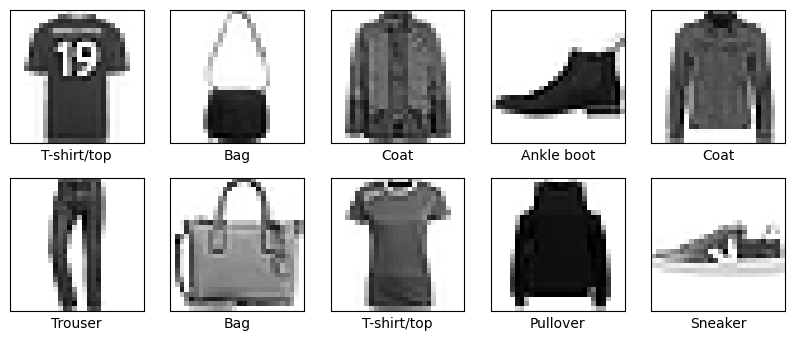

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Set the figure size
plt.figure(figsize=(10, 4))

# Select 10 random indices
random_indices = np.random.choice(len(train_images), 10)

# Plot images and labels
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[idx]])

plt.show()

1. Ask ChatGPT to write a DCNN classifier for Fashion-MNIST data. Specify that the network should use the dropout layers and normalization layers. Code should save the trained network weights, and also save history (loss and accuracy).

2. Plot the evolution of the loss and accuracy for trianing and test data

3. Ask ChatGPT to write the code to plot the ROC curve for the classifier

4. Ask ChatGPT (and provide answers below):
- What is the dimensionality of the input to the classifier?
- What is the dimensionality of the output?
- Why the loss function is chosen?
- What is the metrics for performance?
- What is the role of MaxPool layers?
- What is the role of batch normalization layers?
- Can we use the Relu rather then softmax in the final layer
- What is the function of dropout layers?

Answers:


5. Perform the ablation study. Rewrite the code so that:
- we change the number of neurons (let's say divide it by factor of two several times)
- save the training curve
- save the ROC curve
And then plot them jointly. For example, if originally you had neural network with (128, 256) neurons, then you will generate training and ROC curves for (128,256), (64,  128), (32, 64), AND (16, 32).

# Fashion MNIST VAE

6. Ask Chat GPT to write the simple MLP AE for Fashion MNIST data. Visualzie the latent distribution and latent representations.

7. Ask Chat GPT to write the DCNN VAE AE for Fashion MNIST data. Visualzie the latent distribution and latent representations. Modify the program to save the latent represnetation and latent distributions every 5 steps as images.

8. Can you upload the images and make a movie?

9. Write the defintions for:
- Latent istribution
- Latent represnetation
- Disentangling of represnetations
- Conditional VAE

Answers:

10. Explore if the ChatGPT can write a code for the VAE with rotational invariance

Answers:

11. Ask ChatGPT to write a class-conditioned VAE and plot the latent represnetations.

12. Can you identify the meaning of the latent variables?

Answers:

13. Explore with ChatGPT how VAEs are used for (one of):
- Image analysis
- Deep fakes
- Natural Language Programming
- Drug discovery
- Property optimization

# Example

14. Example: VAE written by ChatGPT

Epoch 1/30
469/469 [==============================] - 19s 9ms/step - loss: 312.6980 - val_loss: 277.9057
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 273.6553 - val_loss: 272.8212
Epoch 3/30
469/469 [==============================] - 4s 7ms/step - loss: 270.0811 - val_loss: 270.2526
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 268.0830 - val_loss: 268.2248
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 266.5072 - val_loss: 268.1187
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 265.5682 - val_loss: 268.4977
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: 264.9324 - val_loss: 266.4536
Epoch 8/30
469/469 [==============================] - 3s 7ms/step - loss: 264.2672 - val_loss: 265.6768
Epoch 9/30
469/469 [==============================] - 3s 7ms/step - loss: 263.8481 - val_loss: 266.1061
Epoch 10/30
469/469 [==============================] - 4s 8ms/s

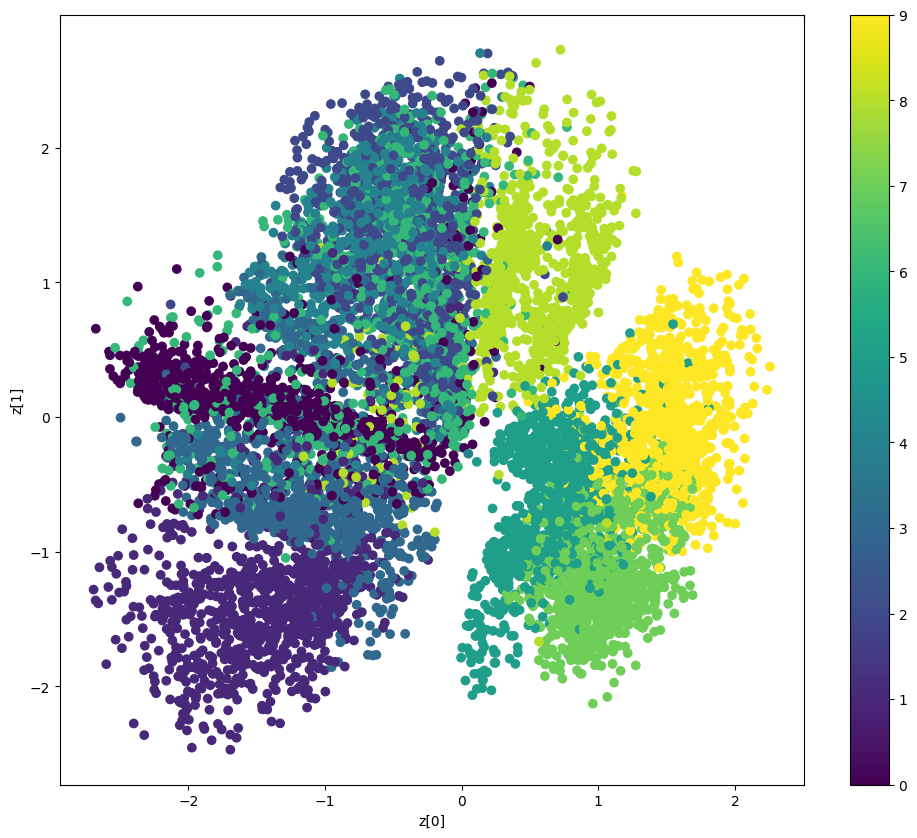

1/1 [==============================] - 0s 20ms/step


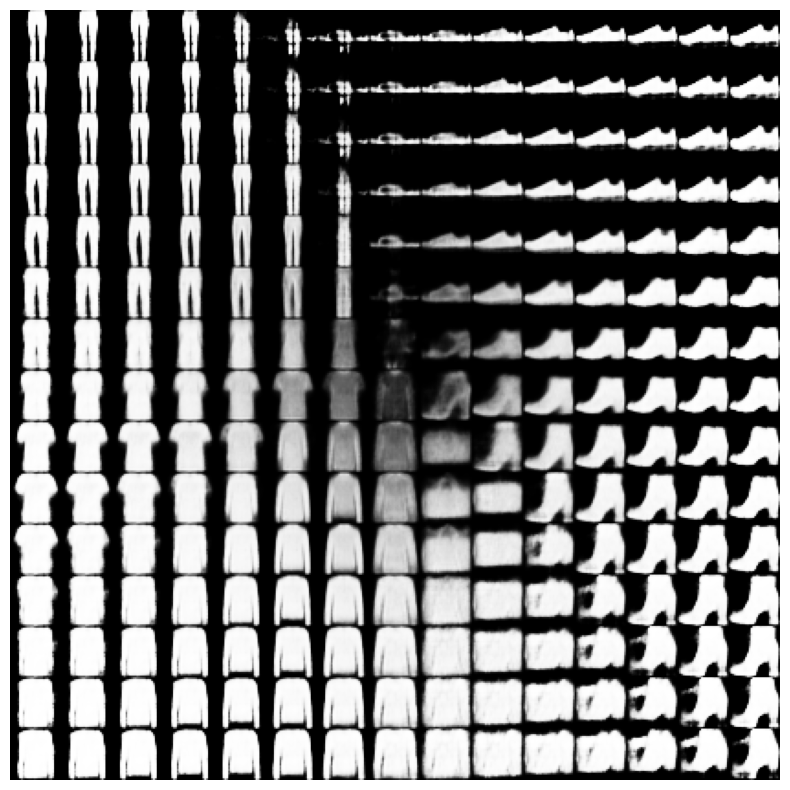

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

latent_dim = 2  # Dimensionality of the latent space

inputs = Input(shape=(image_size, image_size, 1), name='encoder_input')
x = Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(7 * 7 * 64, activation='relu')(latent_inputs)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
outputs = Conv2DTranspose(1, 3, activation='sigmoid', padding='same', name='decoder_output')(x)

decoder = Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

reconstruction_loss = binary_crossentropy(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= image_size * image_size
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.fit(x_train, epochs=30, batch_size=128, validation_data=(x_test, None))

def plot_label_clusters(encoder, data, labels):
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

plot_label_clusters(encoder, x_test, y_test)

n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()